In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys 
sys.path.append('..')

In [3]:
import electrode2currentmap as e2cm
import effectivecurrent2brightness as ec2b

In [4]:
from scipy.signal import fftconvolve

In [5]:
stim = e2cm.Stimulus(tsample=0.075/1000.)

In [6]:
tm = ec2b.TemporalModel(Fs=0.075/1000.)

In [7]:
fr = tm.fast_response(stim.amplitude)
ca = tm.charge_accumulation(fr, stim.amplitude)

In [8]:
%%timeit
sr = tm.slow_response(ca, convolution='numpy')

100 loops, best of 3: 11.4 ms per loop


In [9]:
%%timeit
sr = tm.slow_response(ca, convolution='fftconvolve')

1000 loops, best of 3: 797 µs per loop


In [10]:
%%timeit
sr = tm.slow_response(ca, convolution='sparseconv')

1000 loops, best of 3: 1.05 ms per loop


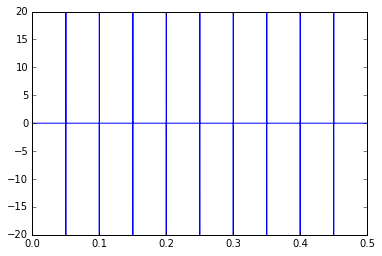

In [11]:
plt.plot(stim.time, stim.amplitude)

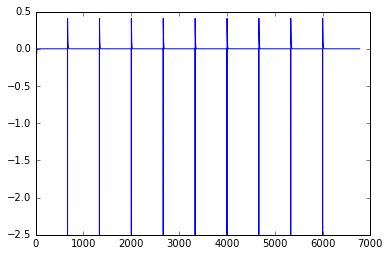

In [12]:
plt.plot(fr)

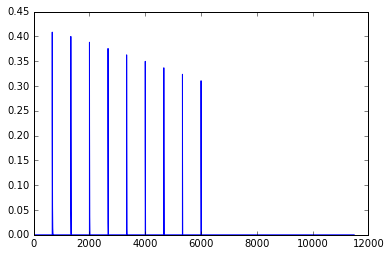

In [13]:
plt.plot(ca)

In [14]:
sr = tm.slow_response(ca, convolution='sparseconv')

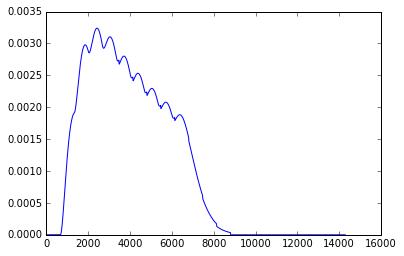

In [15]:
plt.plot(sr)